# Importing Libraries

In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [276]:
df = pd.read_excel(r'Customer_Credit_card.xlsx')

In [277]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [279]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Checking for null values

In [280]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
DEFAULT_PAYMENT_NEXT_MONTH    0
dtype: int64

#### Checking standard deviation of each column

In [281]:
for i in df.columns:
    print(i,'=',df[i].std())

ID = 8660.398374208891
LIMIT_BAL = 129747.66156719506
SEX = 0.4891291960904071
EDUCATION = 0.7903486597208212
MARRIAGE = 0.5219696006131538
AGE = 9.217904068090183
PAY_1 = 1.1238015279973212
PAY_2 = 1.19718597303439
PAY_3 = 1.1968675684467378
PAY_4 = 1.1691386224022984
PAY_5 = 1.1331874060026166
PAY_6 = 1.1499876256077741
BILL_AMT1 = 73635.86057552874
BILL_AMT2 = 71173.76878252918
BILL_AMT3 = 69349.38742703729
BILL_AMT4 = 64332.85613391704
BILL_AMT5 = 60797.155770264195
BILL_AMT6 = 59554.10753674454
PAY_AMT1 = 16563.280354026534
PAY_AMT2 = 23040.870402054872
PAY_AMT3 = 17606.96146980426
PAY_AMT4 = 15666.159744031342
PAY_AMT5 = 15278.30567914539
PAY_AMT6 = 17777.465775434066
DEFAULT_PAYMENT_NEXT_MONTH = 0.4150618056909671


In [282]:
df.shape

(30000, 25)

#### Checking for duplicate values

In [283]:
df.duplicated().sum()

0

In [284]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT_NEXT_MONTH'],
      dtype='object')

# Visualization

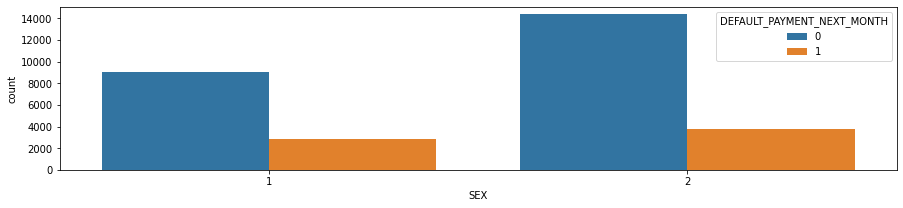

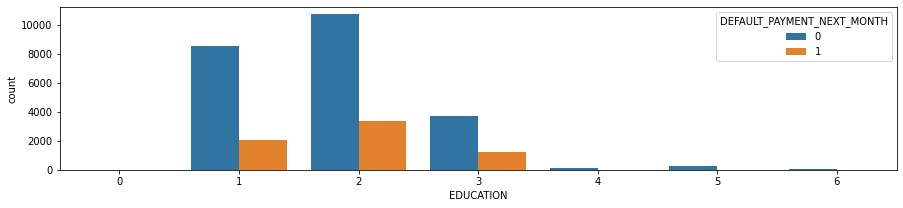

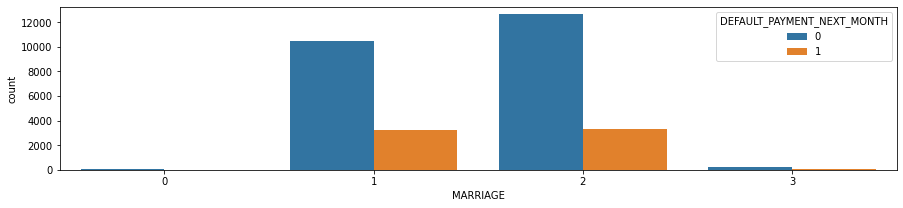

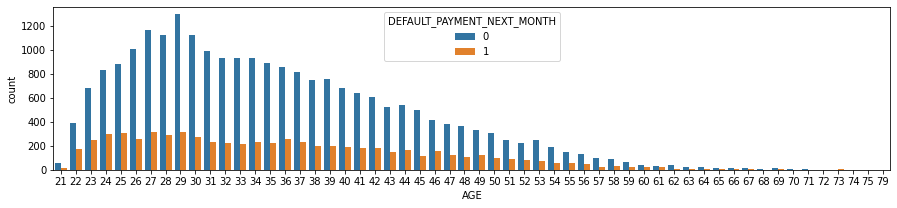

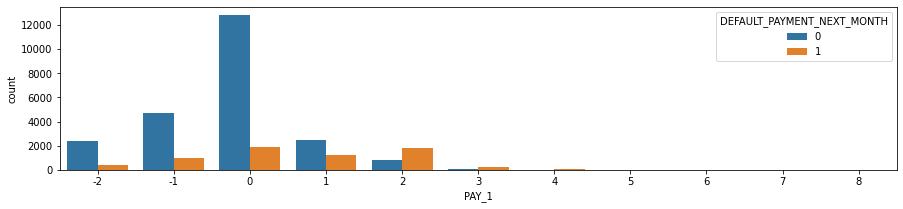

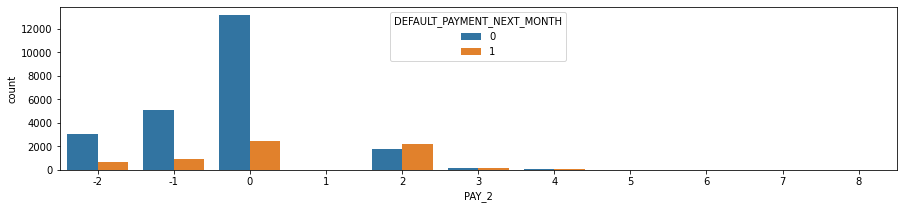

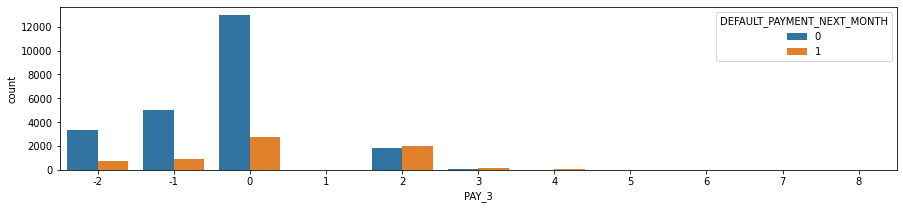

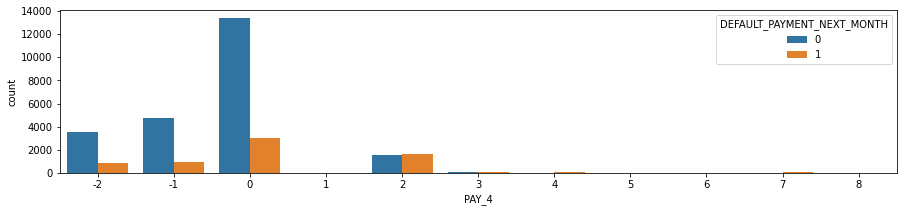

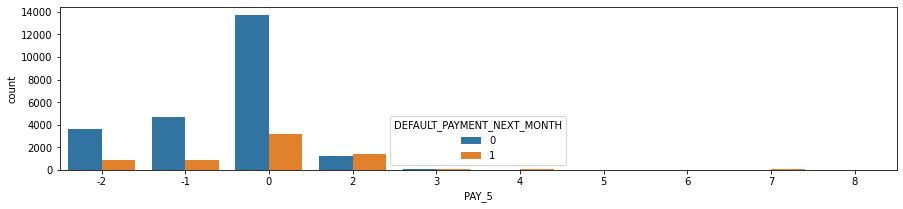

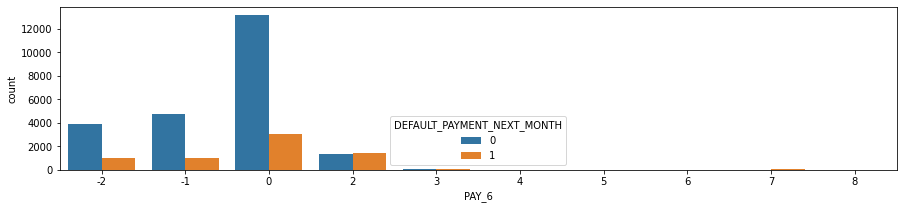

In [285]:
viz  = df[['SEX','EDUCATION','MARRIAGE','AGE', 'PAY_1','PAY_2', 
           'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT_PAYMENT_NEXT_MONTH']]
for i in range(len(viz.columns)-1):
    plt.figure(figsize=(15,3))
    sns.countplot(x=viz.iloc[:,i],data=viz,hue='DEFAULT_PAYMENT_NEXT_MONTH')

- There are more female customer with count of 18112 while male customers count 11888
- Ratio of female defaulters and male defaulters is approximately same
- Education of customer lies between 1 and 3 while their are very few customer between 4 and 6
- People with Education value 2 have high number of defaulter compared to other education value
- Most customers lies between age of 21 to 53

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

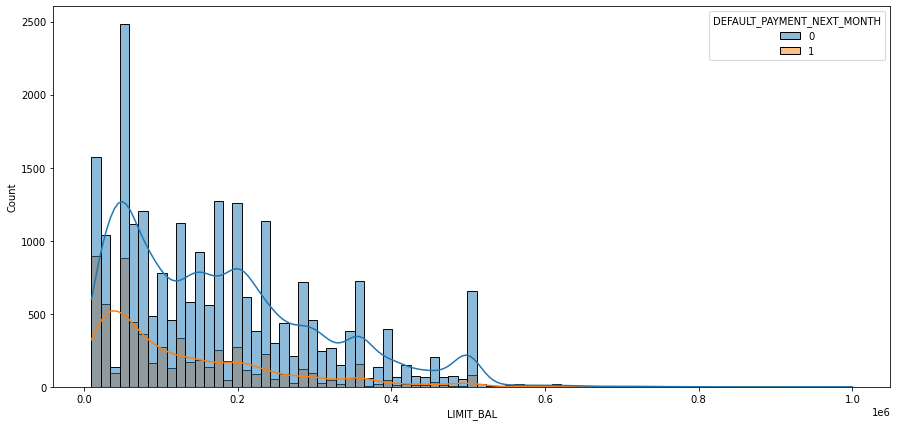

In [286]:
plt.figure(figsize=(15,7))
sns.histplot(x=df['LIMIT_BAL'],hue='DEFAULT_PAYMENT_NEXT_MONTH',data=df,kde=True)

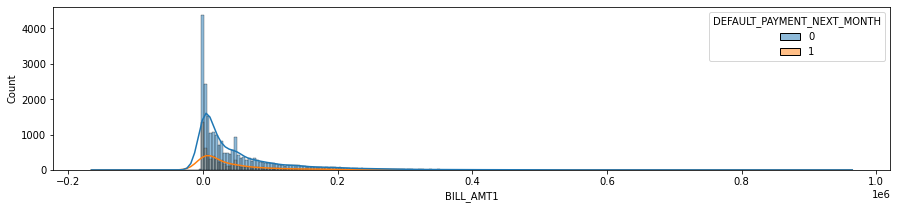

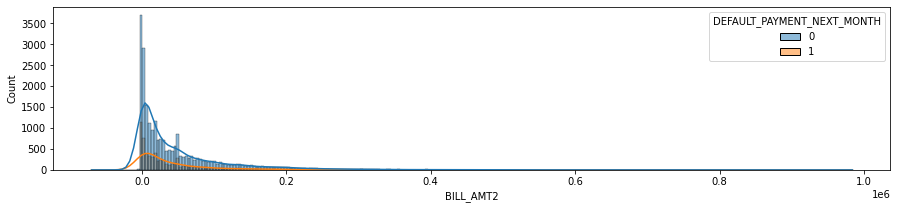

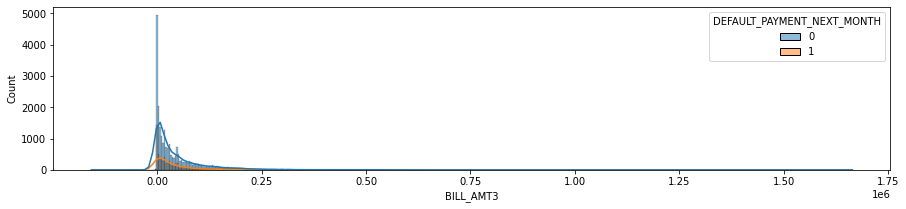

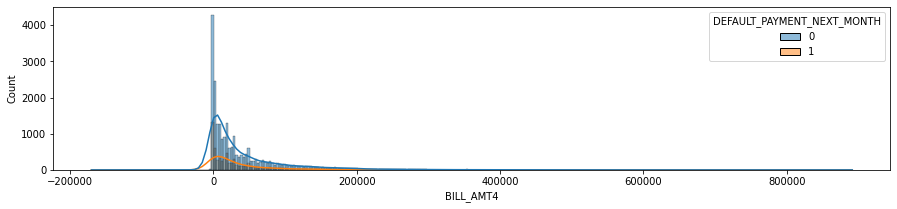

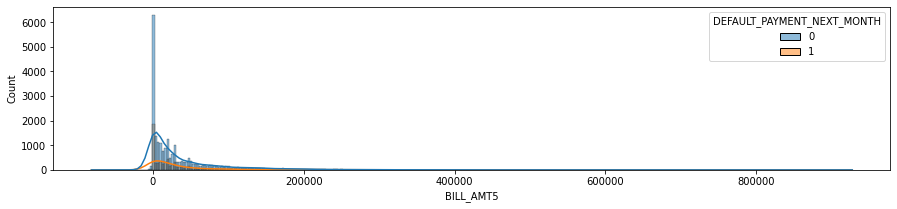

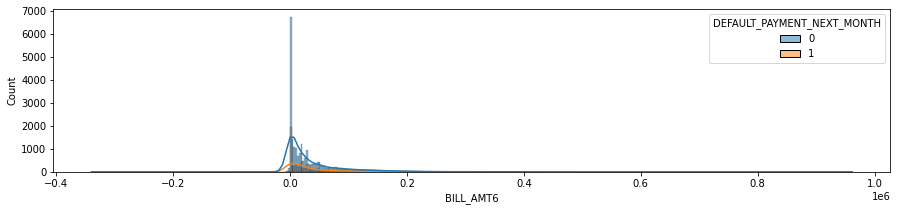

In [287]:
bill_amt = df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','DEFAULT_PAYMENT_NEXT_MONTH']]
for i in range(len(bill_amt.columns)-1):
    plt.figure(figsize=(15,3))
    sns.histplot(x=bill_amt.iloc[:,i],data=bill_amt,kde=True,hue='DEFAULT_PAYMENT_NEXT_MONTH')

- As most of the dataset lies at same point we can add these values

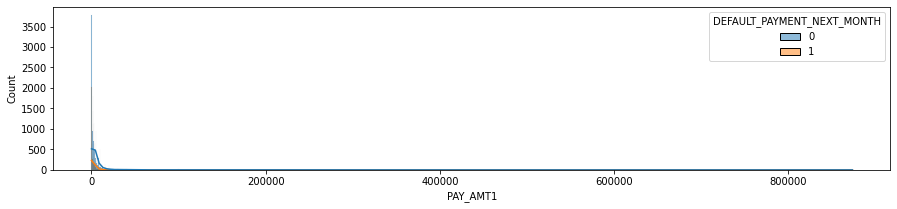

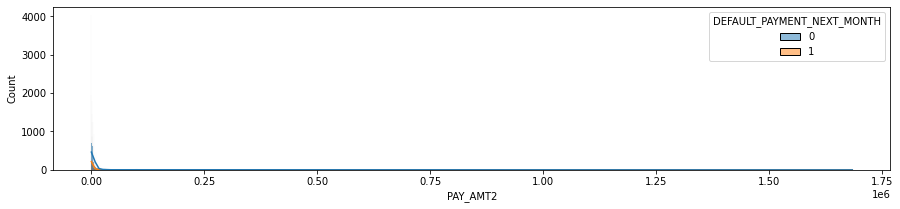

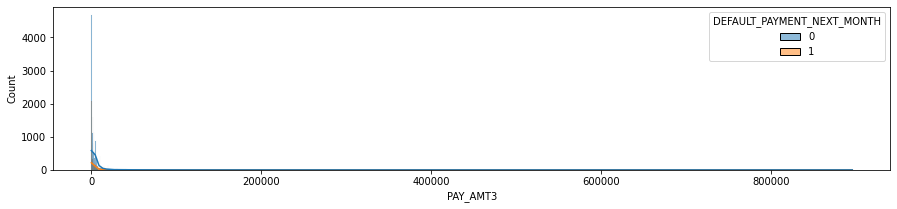

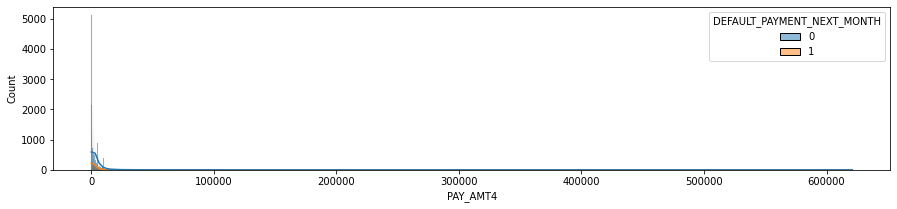

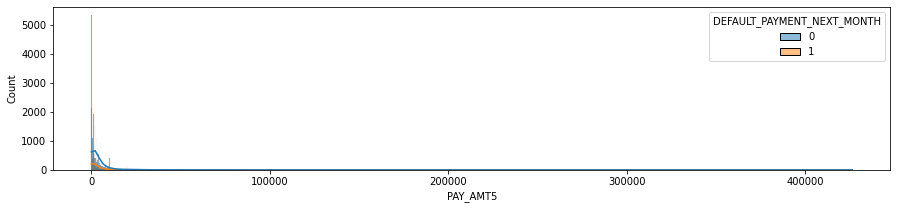

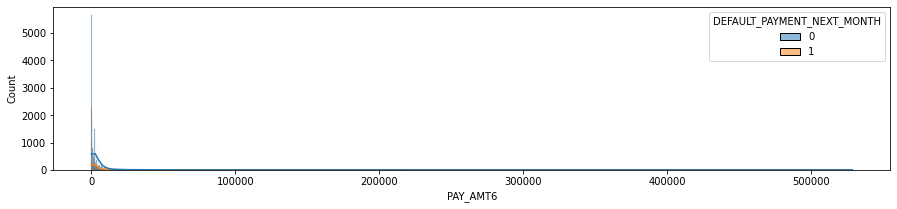

In [288]:
pay_amt = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','DEFAULT_PAYMENT_NEXT_MONTH']]
for i in range(len(pay_amt.columns)-1):
    plt.figure(figsize=(15,3))
    sns.histplot(x=pay_amt.iloc[:,i],data=pay_amt,kde=True,hue='DEFAULT_PAYMENT_NEXT_MONTH')

- As most of the dataset lies at same point we can add these values

In [289]:
df['TOTAL_BILL_AMT'] = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['TOTAL_PAY_AMT'] = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

In [290]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH,TOTAL_BILL_AMT,TOTAL_PAY_AMT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,7704,689
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,17077,5000
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,109339,59049


In [291]:
df_new = df
df_new.drop(columns=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],inplace=True)
df_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT_PAYMENT_NEXT_MONTH,TOTAL_BILL_AMT,TOTAL_PAY_AMT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,7704,689
1,2,120000,2,2,2,26,-1,2,0,0,0,2,1,17077,5000
2,3,90000,2,2,2,34,0,0,0,0,0,0,0,101653,11018
3,4,50000,2,2,1,37,0,0,0,0,0,0,0,231334,8388
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,0,109339,59049


In [292]:
df_new.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [293]:
df_new.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [294]:
df_new = df_new[(df_new.EDUCATION != 4)]
df_new = df_new[(df_new.EDUCATION != 6)]
df_new = df_new[(df_new.EDUCATION != 0)]

In [296]:
df_new = df_new[(df_new.MARRIAGE != 0)]
df_new = df_new[(df_new.MARRIAGE != 3)]

In [336]:
# df_new.to_csv('Customer_credit_default.csv')

In [300]:
X = df_new.drop(columns=['DEFAULT_PAYMENT_NEXT_MONTH','ID'])
y = df_new['DEFAULT_PAYMENT_NEXT_MONTH']

## Feature Selection

In [301]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

<AxesSubplot:xlabel='importance', ylabel='features'>

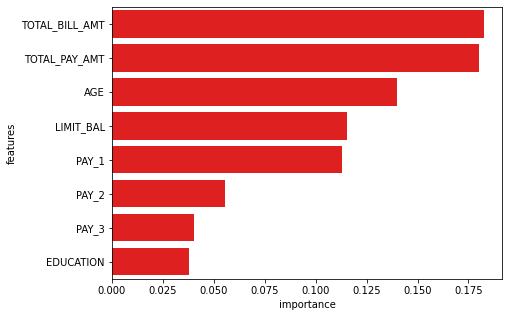

In [302]:
imp_feature = pd.DataFrame(model.feature_importances_,columns=['importance'])
imp_feature['features'] = X.columns
imp_feature = imp_feature.sort_values('importance',ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(y=imp_feature['features'][:8],x = imp_feature['importance'],color='red')

# Model Building

In [337]:
X = df_new[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE', 'PAY_1','PAY_2', 'PAY_3','TOTAL_BILL_AMT','TOTAL_PAY_AMT']]
y = df_new['DEFAULT_PAYMENT_NEXT_MONTH']

### Train Test Split

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=99)

### Scaling independent features

In [339]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## Logistic Regression

In [340]:
log_reg = LogisticRegression(random_state=99)
log_reg.fit(X_train_s,y_train)

LogisticRegression(random_state=99)

In [341]:
y_pred_log = log_reg.predict(X_test_s)
print(f'accuracy: {accuracy_score(y_test,y_pred_log)}')

accuracy: 0.8054800724637681


### Model Evaluation

In [342]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6863
           1       0.68      0.24      0.36      1969

    accuracy                           0.81      8832
   macro avg       0.75      0.60      0.62      8832
weighted avg       0.79      0.81      0.77      8832



Text(42.0, 0.5, 'True')

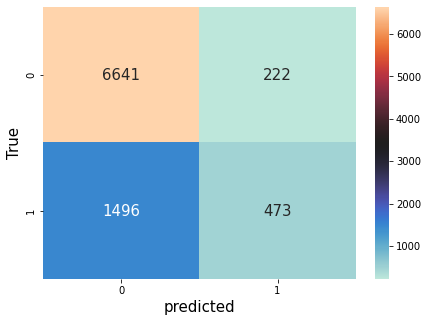

In [343]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True,fmt ='3',cmap='icefire',annot_kws={'fontsize': 15})
plt.xlabel('predicted',fontsize=15)
plt.ylabel('True',fontsize=15)

## Decision Tree

In [344]:
dtree = DecisionTreeClassifier(random_state=99)
dtree.fit(X_train_s,y_train)

DecisionTreeClassifier(random_state=99)

In [345]:
y_pred_dtree = dtree.predict(X_test_s)
print(f'accuracy: {accuracy_score(y_test,y_pred_dtree)}')

accuracy: 0.7169384057971014


### Model Evaluation

In [346]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6863
           1       0.38      0.41      0.39      1969

    accuracy                           0.72      8832
   macro avg       0.60      0.61      0.60      8832
weighted avg       0.73      0.72      0.72      8832



Text(42.0, 0.5, 'True')

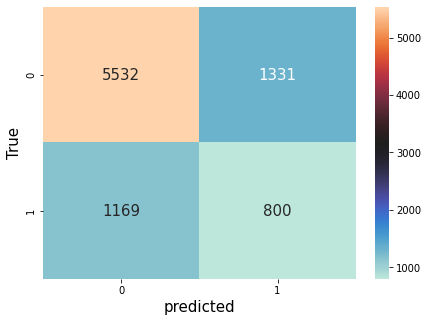

In [347]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred_dtree),annot=True,fmt ='3',cmap='icefire',annot_kws={'fontsize': 15})
plt.xlabel('predicted',fontsize=15)
plt.ylabel('True',fontsize=15)

### Hyperparameter Tuning

In [348]:
np.random.seed(44)
param_dict = {
    'max_depth': [3,5,6,7], 'min_samples_split' : [50,100,150,200,250],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

gv_dt = GridSearchCV(dtree, param_grid=param_dict, cv = 10,n_jobs=3)
gv_dt.fit(X_train_s, y_train)

print('Best Parameters using grid search: \n', gv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_split': 50}


In [349]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=None,min_samples_split=50,random_state=99)
dtree.fit(X_train_s,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=99)

In [350]:
y_pred_dtree = dtree.predict(X_test_s)
print(f'accuracy: {accuracy_score(y_test,y_pred_dtree)}')

accuracy: 0.8200860507246377


### Model Evaluation

In [351]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6863
           1       0.70      0.33      0.45      1969

    accuracy                           0.82      8832
   macro avg       0.77      0.65      0.67      8832
weighted avg       0.80      0.82      0.79      8832



Text(42.0, 0.5, 'True')

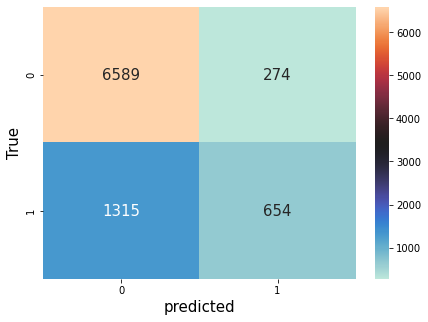

In [352]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred_dtree),annot=True,fmt ='3',cmap='icefire',annot_kws={'fontsize': 15})
plt.xlabel('predicted',fontsize=15)
plt.ylabel('True',fontsize=15)

## Random Forest

In [353]:
rf = RandomForestClassifier(criterion='gini',n_estimators=350,max_depth=10,
                            min_samples_split = 5,random_state=0)
rf.fit(X_train_s,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=350,
                       random_state=0)

In [354]:
y_pred_rf = rf.predict(X_test_s)
print(f'accuracy: {accuracy_score(y_test,y_pred_rf)}')

accuracy: 0.8204257246376812


### Model Evaluation

In [355]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6863
           1       0.68      0.37      0.48      1969

    accuracy                           0.82      8832
   macro avg       0.76      0.66      0.68      8832
weighted avg       0.80      0.82      0.80      8832



Text(42.0, 0.5, 'True')

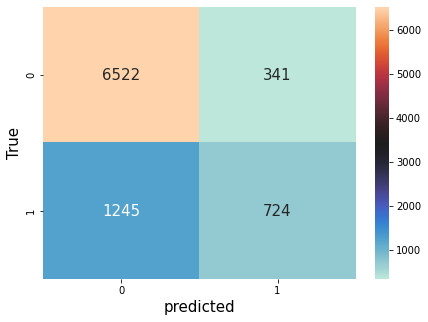

In [356]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt ='3',cmap='icefire',annot_kws={'fontsize': 15})
plt.xlabel('predicted',fontsize=15)
plt.ylabel('True',fontsize=15)

In [357]:
accuracy_rate = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_s,y_train,cv=20)
    accuracy_rate.append(score.mean())

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (12,10))
plt.plot(range(1,100),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value', fontsize = 20)
plt.xlabel('K Neighbors', fontsize = 15)
plt.ylabel('Accuracy Rate', fontsize = 15)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=62)
knn.fit(X_train_s, y_train)
y_pred_knn = knn.predict(X_test_s)
print(f'accuracy: {accuracy_score(y_test,y_pred_knn)}')

In [325]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6863
           1       0.65      0.34      0.45      1969

    accuracy                           0.81      8832
   macro avg       0.74      0.65      0.67      8832
weighted avg       0.79      0.81      0.79      8832



Text(42.0, 0.5, 'True')

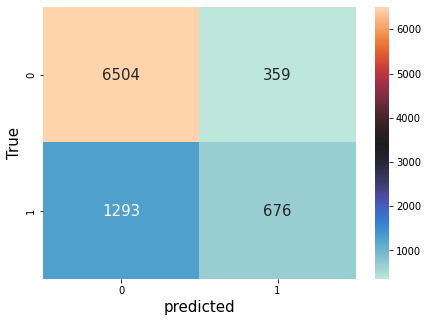

In [326]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt ='3',cmap='icefire',annot_kws={'fontsize': 15})
plt.xlabel('predicted',fontsize=15)
plt.ylabel('True',fontsize=15)

- Random Forest Classifier is best model out of all the model used

# END